# Forecasting sales of different category of products and comparing them

## Importing Libraries

In [1]:
%matplotlib inline
import itertools
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

## Reading data


In [2]:
df = pd.read_excel("Superstore.xls") #importing dataset
df.head(5) #displaying the first 5 data of the dataset

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
df.shape #displaying rows and coloums of the dataset

(9994, 21)

In [4]:
df.dtypes #displaying the datatype of all coloumns

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

## Looking at categories

In [5]:
df['Category'].unique() 

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [6]:
furniture = df.loc[df['Category'] == 'Furniture'] #selecting only furniture from category coloum of the dataset

In [7]:
furniture['Order Date'].min(), furniture['Order Date'].max()

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

## Data preprocessing

Removing unwanted coloums, cheacking for null values

In [8]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True) #droping all coloums we dont need (all coloums except order date and sales)
furniture = furniture.sort_values('Order Date') #sorting our data in order of date ordered
furniture.isnull().sum() #cheacking how many null values we have

Order Date    0
Sales         0
dtype: int64

In [9]:
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index() #adding daily sales to get daywise sales for each month
furniture.head()

,Order Date,Sales
0,2014-01-06,2573.820
1,2014-01-07,76.728
2,2014-01-10,51.940
3,2014-01-11,9.940
4,2014-01-13,879.939


In [10]:
furniture = furniture.set_index('Order Date') #setting order date as index
furniture.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14', '2014-01-16', '2014-01-19',
               '2014-01-20', '2014-01-21',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

As we can see our data is not collected everyday of a month so we are taking the mean of the sales and use it for a month

In [11]:
y = furniture['Sales'].resample('MS').mean() #resample is used to convert the freq of a time series data and MS is month start frequency
y.head(15)

Order Date
2014-01-01     480.194231
2014-02-01     367.931600
2014-03-01     857.291529
2014-04-01     567.488357
2014-05-01     432.049188
2014-06-01     695.059242
2014-07-01     601.169500
2014-08-01     457.521656
2014-09-01     992.353367
2014-10-01     769.015437
2014-11-01     980.221486
2014-12-01    1532.298325
2015-01-01     978.328467
2015-02-01     522.395667
2015-03-01     781.236437
Freq: MS, Name: Sales, dtype: float64

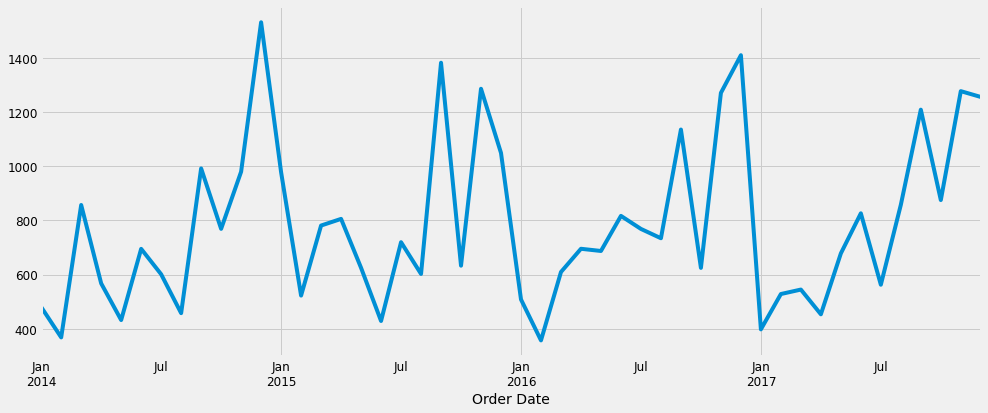

In [12]:
y.plot(figsize=(15, 6)) #ploting our furniture sales data into graph for visualising
plt.show()

From the graph we can see that sales are always low at the starting of the year and high at the end of the year. There is an upward trend within every single year with some low months in mid year.

## Spliting the dataset into train and test

In [13]:
y_train=y[:len(y)-11]
y_test=y[(len(y)-11):]

In [14]:
y_train[-3:] #looking at last 3 months of train dataset

Order Date
2016-11-01    1271.345152
2016-12-01    1410.719808
2017-01-01     397.602133
Freq: MS, Name: Sales, dtype: float64

<AxesSubplot:xlabel='Order Date'>

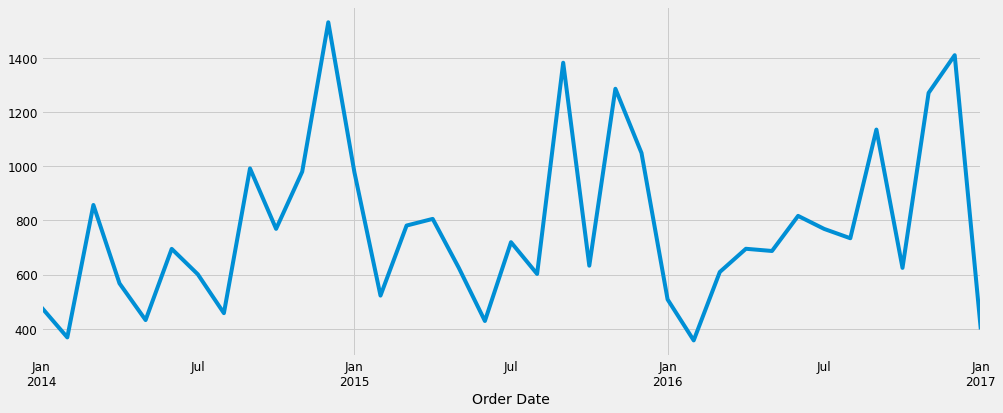

In [15]:
y_train.plot(figsize=(15, 6))

<AxesSubplot:xlabel='Order Date'>

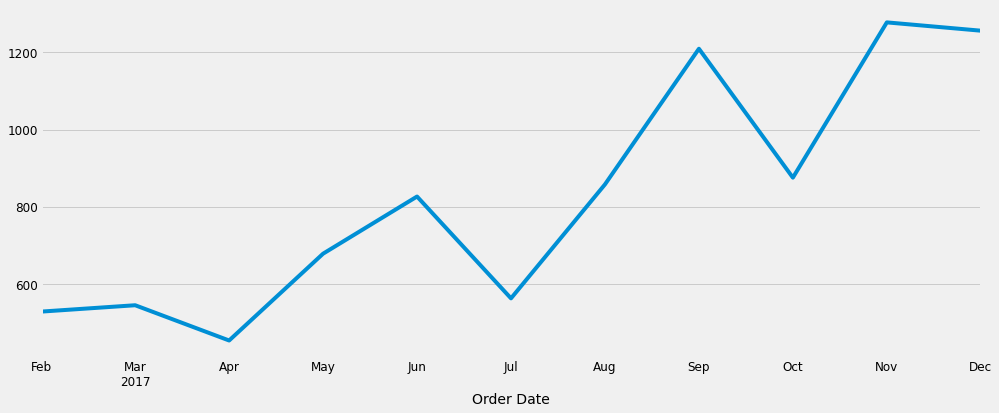

In [16]:
y_test.plot(figsize=(15, 6))

## Ad Fuller test to check the stationarity of if we need any transformation

In [17]:
result=adfuller(y_train)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')

for key,value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.924040
p-value: 0.001865
Critical Values:
	1%: -3.711
	5%: -2.981
	10%: -2.630


We can see that the series is stationary as p-value is close to 0

## Looking at time series decomposition to see trend, seasonality and residuals

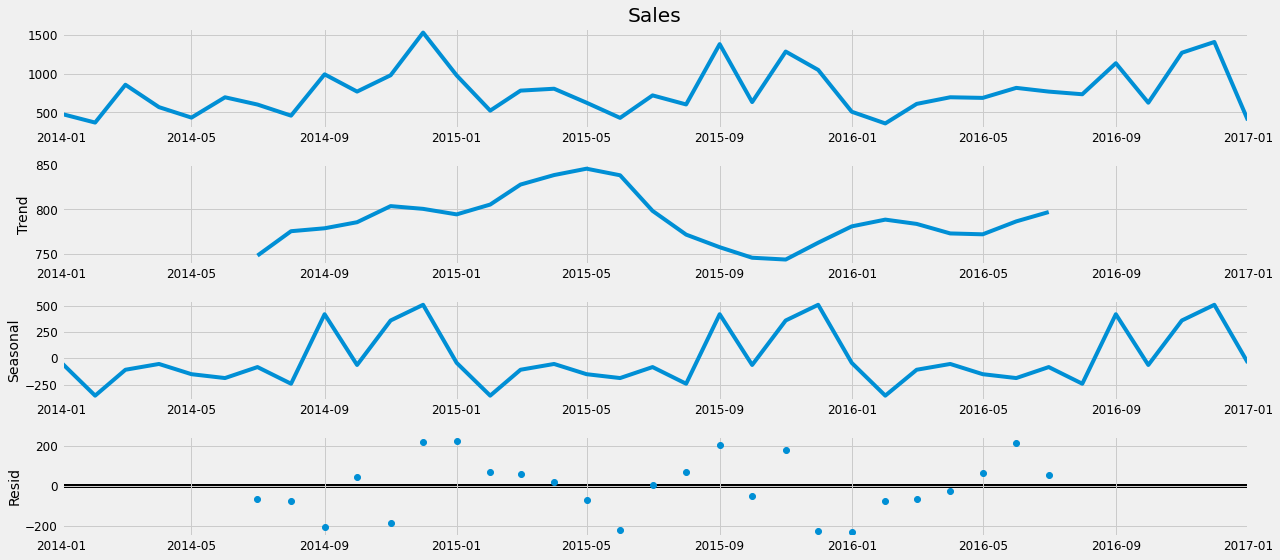

In [18]:
#visualising data using time series decomposition
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y_train, model='additive')
decomposition.plot()
plt.show()

From this we can see that we have seasonality so we are using SARIMA model here

# Time series forecasting of furniture with SARIMA model


SARIMA has 7 components, 3 for ARIMA and 4 for seasonal component

3 components of ARIMA are p,d,q (auto regressive, diffrence, moving average)

4 components for seasonal part are P,D,Q and seasonal frequency  

We will take seasonal frequency as 12 as we can see in the graph that the data shows seasonality after 12 months

In [19]:
p = d = q = range(0, 2) #taking 0,1,2 for p,d,q
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]  #using SARIMA because the data is non-stationary
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [20]:
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

In [21]:
#SARIMA model
result_dict=dict()
for param in pdq: #loop for 3 parameters of ARIMA
    for param_seasonal in seasonal_pdq: #loop for 3 parameters of seasonal component
        try:
            mod = sm.tsa.statespace.SARIMAX(y_train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            result = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, result.aic))
            result_dict.update({(param,param_seasonal):result.aic})
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:588.8073656354634
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1051.0649490364744
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:333.42301437135455
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:160.89803251519655
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:352.24508004766125
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:334.5074901819362
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:175.38942922952054
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:162.86109745753816
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:550.5783033904563
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1821.9965975468292
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:322.1266824774406
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:149.52864752896096
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:353.8393121912528
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:323.445676360843
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:176.19800489216013
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:150.06780979467447
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:522.1157354376996
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:338.68913418612414


In [22]:
{k: v for k, v in sorted(result_dict.items(), key=lambda x: x[1])} #sorting the dict by values to get the smallest AIC

{((0, 1, 1), (0, 1, 1, 12)): 137.7567585039499,
 ((0, 1, 1), (1, 1, 1, 12)): 139.72888451285903,
 ((1, 1, 1), (0, 1, 1, 12)): 139.75512945958295,
 ((1, 1, 1), (1, 1, 1, 12)): 142.9528221497178,
 ((0, 0, 1), (0, 1, 1, 12)): 149.52864752896096,
 ((0, 0, 1), (1, 1, 1, 12)): 150.06780979467447,
 ((1, 0, 1), (0, 1, 1, 12)): 150.81741617234923,
 ((1, 0, 1), (1, 1, 1, 12)): 151.96335006584798,
 ((0, 1, 0), (0, 1, 1, 12)): 152.17758742252215,
 ((0, 1, 0), (1, 1, 1, 12)): 153.60365306060328,
 ((1, 1, 0), (0, 1, 1, 12)): 153.75398823242742,
 ((1, 1, 0), (1, 1, 0, 12)): 153.7929961954431,
 ((1, 1, 1), (1, 1, 0, 12)): 154.2340015907568,
 ((1, 1, 0), (1, 1, 1, 12)): 155.48738562225748,
 ((0, 0, 0), (0, 1, 1, 12)): 160.89803251519655,
 ((1, 0, 0), (1, 1, 1, 12)): 161.94855194882294,
 ((1, 0, 0), (1, 1, 0, 12)): 162.11004514392687,
 ((1, 0, 0), (0, 1, 1, 12)): 162.14444984662214,
 ((0, 0, 0), (1, 1, 1, 12)): 162.86109745753816,
 ((1, 0, 1), (1, 1, 0, 12)): 164.36249979462684,
 ((0, 1, 0), (1, 1, 0, 1

In [23]:
#fitting the lowest AIC
mod = sm.tsa.statespace.SARIMAX(y_train,
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 1, 12), 
                                enforce_stationarity=False,
                                enforce_invertibility=False)
result = mod.fit()
print(result.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0000   2506.183     -0.000      1.000   -4913.028    4911.028
ma.S.L12      -2.7463      1.562     -1.758      0.079      -5.808       0.316
sigma2      3728.1502   9.34e+06      0.000      1.000   -1.83e+07    1.83e+07


# Validating Forecast

Comparing predicted sales to real sales

In [24]:
forecast = result.get_prediction(start=pd.to_datetime('2017-02-01'), dynamic=False) #setting forecast to start from 2017-02-01 to end of the data
predictions=forecast.predicted_mean

actual = y_test['2017-02-01':]

rmse = np.sqrt((predictions - actual) ** 2).mean() 
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 2))) #root mean squared error of the model

The Root Mean Squared Error of our forecasts is 111.8


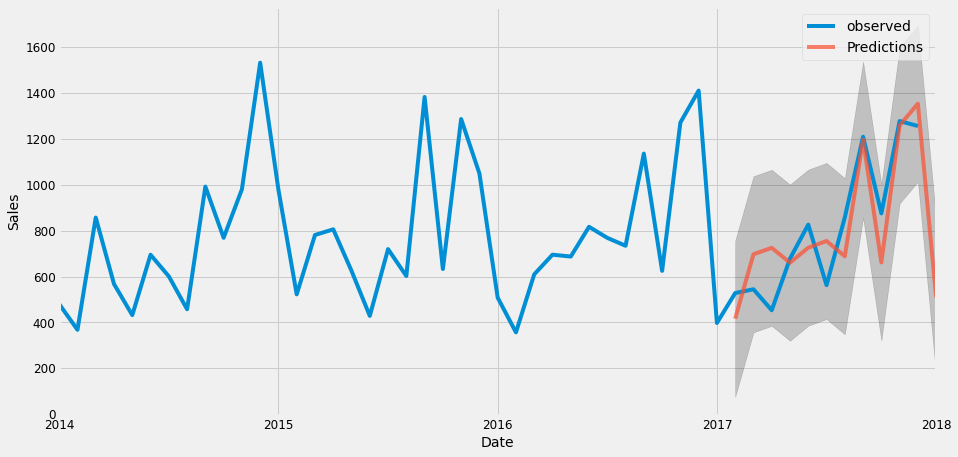

In [25]:
forecast = result.get_forecast(steps=12) #getting forecast for next 12steps

#predictions and confidence interval
predictions=forecast.predicted_mean
ci = forecast.conf_int()

#observed plot
fig = y.plot(label='observed', figsize=(14, 7))
fig.set_xlabel('Date')
fig.set_ylabel('Sales')
fig.fill_between(ci.index,
                ci.iloc[:, 0],
                ci.iloc[:, 1], color='k', alpha=.2)

#prediction plot
predictions.plot(ax=fig, label='Predictions', alpha=.7, figsize=(14,7))

plt.legend()
plt.show()

From the graph we can see that our model has taken the trend i.e. lowwer at the starting of year and higger at the end of the year

# Producing and visualizing forecasts

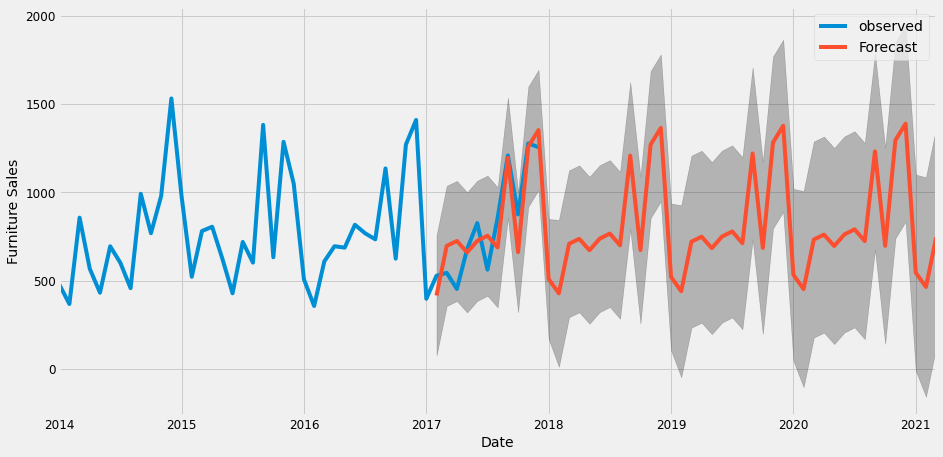

In [26]:
forecast_uc = result.get_forecast(steps=50)
ci = forecast_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
forecast_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(ci.index,
                ci.iloc[:, 0],
                ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

# Time Series of Furniture vs. Office Supplies

In [27]:
furniture = df.loc[df['Category'] == 'Furniture']
office = df.loc[df['Category'] == 'Office Supplies']
furniture.shape, office.shape #shape of both the datasets

((2121, 21), (6026, 21))

### Comparing sales of both categories

In [28]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)
office.drop(cols, axis=1, inplace=True)
furniture = furniture.sort_values('Order Date')
office = office.sort_values('Order Date')
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
office = office.groupby('Order Date')['Sales'].sum().reset_index()
furniture = furniture.set_index('Order Date')
office = office.set_index('Order Date')
y_furniture = furniture['Sales'].resample('MS').mean()
y_office = office['Sales'].resample('MS').mean()
furniture = pd.DataFrame({'Order Date':y_furniture.index, 'Sales':y_furniture.values})
office = pd.DataFrame({'Order Date': y_office.index, 'Sales': y_office.values})
store = furniture.merge(office, how='inner', on='Order Date')
store.rename(columns={'Sales_x': 'furniture_sales', 'Sales_y': 'office_sales'}, inplace=True)
store.head()

,Order Date,furniture_sales,office_sales
0,2014-01-01,480.194231,285.357647
1,2014-02-01,367.931600,63.042588
2,2014-03-01,857.291529,391.176318
3,2014-04-01,567.488357,464.794750
4,2014-05-01,432.049188,324.346545


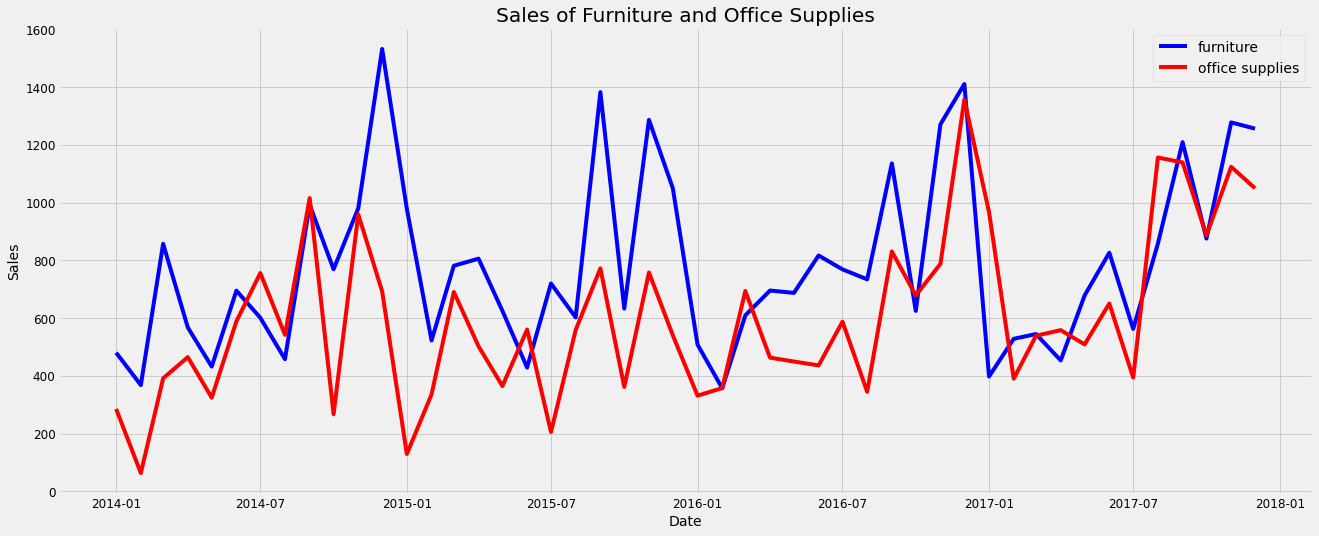

In [29]:
#ploting graph of both sales together 
plt.figure(figsize=(20, 8))
plt.plot(store['Order Date'], store['furniture_sales'], 'b-', label = 'furniture')
plt.plot(store['Order Date'], store['office_sales'], 'r-', label = 'office supplies')
plt.xlabel('Date'); plt.ylabel('Sales'); plt.title('Sales of Furniture and Office Supplies')
plt.legend();

From the graph observe that sales of furniture and office supplies shared a similar seasonal pattern. Early of the year sales is low for both of the two categories.Average daily sales for furniture are higher than those of office supplies in most of the months.

# Time Series Modeling with Prophet


In [30]:
from fbprophet import Prophet #importing the library

furniture = furniture.rename(columns={'Order Date': 'ds', 'Sales': 'y'})
furniture_model = Prophet(interval_width=0.95) #setting uncertainty intervel to 95% 
furniture_model.fit(furniture)

office = office.rename(columns={'Order Date': 'ds', 'Sales': 'y'})
office_model = Prophet(interval_width=0.95) #setting uncertainty intervel to 95% 
office_model.fit(office)

furniture_forecast = furniture_model.make_future_dataframe(periods=36, freq='MS') #forecasting sales for next 3 years
furniture_forecast = furniture_model.predict(furniture_forecast)

office_forecast = office_model.make_future_dataframe(periods=36, freq='MS') #forecasting sales for next 3 years
office_forecast = office_model.predict(office_forecast)

Importing plotly failed. Interactive plots will not work.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<Figure size 1296x432 with 0 Axes>

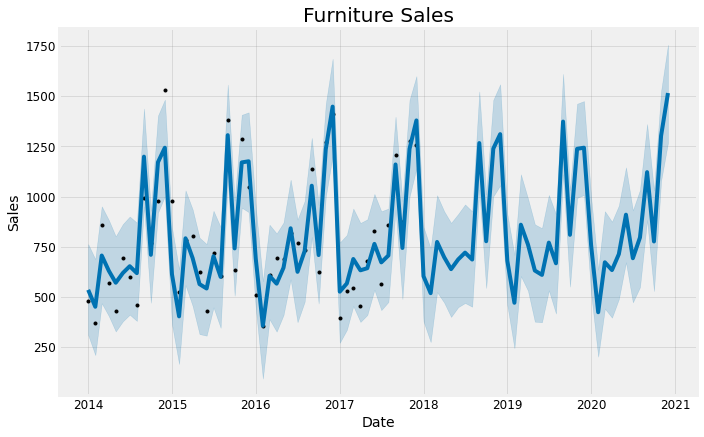

In [31]:
plt.figure(figsize=(18, 6)) 
furniture_model.plot(furniture_forecast, xlabel = 'Date', ylabel = 'Sales') #ploting graph for furniture forecast
plt.title('Furniture Sales');

<Figure size 1296x432 with 0 Axes>

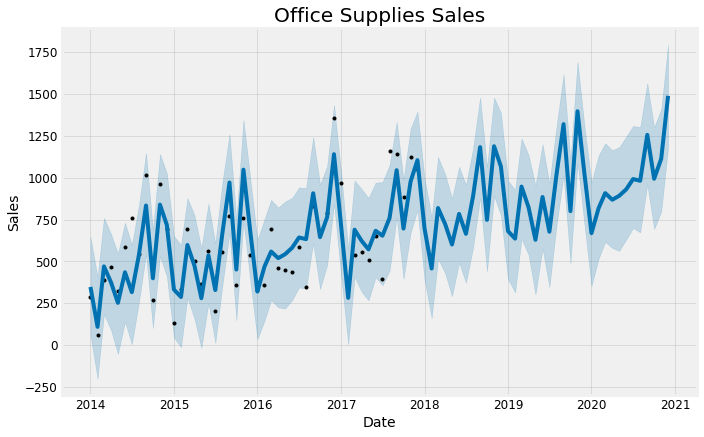

In [32]:
plt.figure(figsize=(18, 6))
office_model.plot(office_forecast, xlabel = 'Date', ylabel = 'Sales') #ploting graph for office supplies forecast
plt.title('Office Supplies Sales');

## Comparing Forecasts

In [33]:
#merging forcast of both the categories to compare
furniture_names = ['furniture_%s' % column for column in furniture_forecast.columns]
office_names = ['office_%s' % column for column in office_forecast.columns]
merge_furniture_forecast = furniture_forecast.copy()
merge_office_forecast = office_forecast.copy()
merge_furniture_forecast.columns = furniture_names
merge_office_forecast.columns = office_names
forecast = pd.merge(merge_furniture_forecast, merge_office_forecast, how = 'inner', left_on = 'furniture_ds', right_on = 'office_ds')
forecast = forecast.rename(columns={'furniture_ds': 'Date'}).drop('office_ds', axis=1)

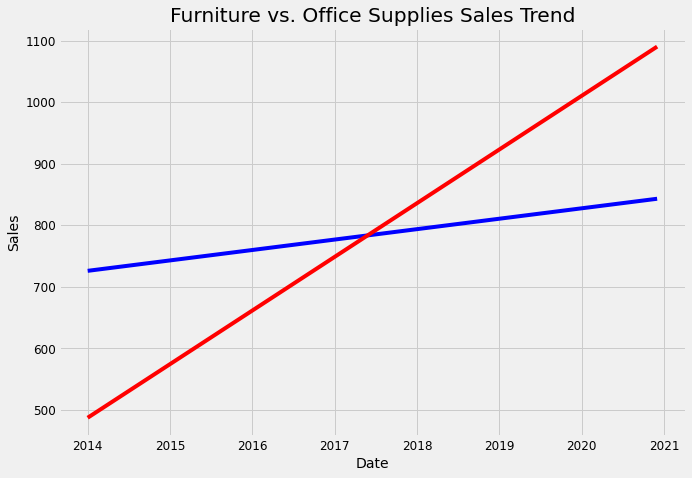

In [34]:
#plotting the trend of both the categories 
plt.figure(figsize=(10, 7))
plt.plot(forecast['Date'], forecast['furniture_trend'], 'b-') #blue is set to furniture trend
plt.plot(forecast['Date'], forecast['office_trend'], 'r-') #red is set to office supplies trend
plt.xlabel('Date'); plt.ylabel('Sales')
plt.title('Furniture vs. Office Supplies Sales Trend');

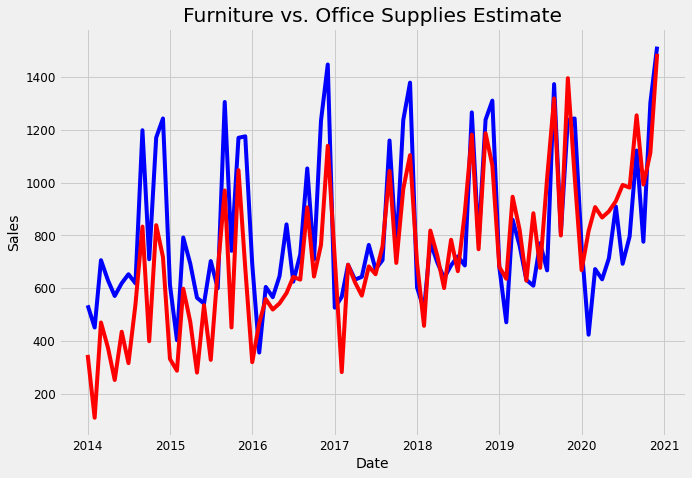

In [35]:
#plotting the yhat values i.e. forcasted sales of both the categories
plt.figure(figsize=(10, 7))
plt.plot(forecast['Date'], forecast['furniture_yhat'], 'b-') #blue is set to furniture yhat
plt.plot(forecast['Date'], forecast['office_yhat'], 'r-') #red is set to office supplies yhat
plt.xlabel('Date'); plt.ylabel('Sales')
plt.title('Furniture vs. Office Supplies Estimate');

From both the graphs we can see that the Office Supplies Sales have a high rise in the future and crosses the sales of Furniture in near future.